In [2]:
import pandas as pd
import text2emotion as te
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
tqdm.pandas()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\18076\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\18076\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\18076\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
df = pd.read_pickle('data/pickle/parler.pkl')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129005 entries, 0 to 129004
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   neg       129005 non-null  float64
 1   neu       129005 non-null  float64
 2   pos       129005 non-null  float64
 3   compound  129005 non-null  float64
 4   text      129005 non-null  object 
 5   label     129005 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 5.9+ MB


In [32]:
df['hap'] = np.nan
df['ang'] = np.nan
df['spr'] = np.nan
df['sad'] = np.nan
df['fri'] = np.nan

In [33]:
def get_emotions(text):
    emo = te.get_emotion(text)
    return pd.Series({
        'hap': emo['Happy'],
        'ang': emo['Angry'],
        'spr': emo['Surprise'],
        'sad': emo['Sad'],
        'fri': emo['Fear']
    })

df[['hap', 'ang', 'spr', 'sad', 'fri']] = df['text'].progress_apply(get_emotions)

  0%|          | 0/129005 [00:00<?, ?it/s]

In [34]:
df = df.drop(df[df['hap'] + df['sad'] + df['ang'] + df['spr'] + df['fri'] == 0].index.values.tolist())
df

,neg,neu,pos,compound,text,label,hap,ang,spr,sad,fri
0,0.155,0.845,0.000,-0.6705,Did you all see #twitterisdown after twitter c...,-1,0.00,0.25,0.00,0.50,0.25
1,0.325,0.675,0.000,-0.4389,"Bull crap! Most do, a few do not.",-1,0.00,0.00,1.00,0.00,0.00
2,0.247,0.753,0.000,-0.3182,Mourinho interrupts Son interview to give Kane...,-1,0.00,0.00,0.00,0.00,1.00
3,0.137,0.526,0.337,0.4404,"Sorry. I enjoy demon sperm, and alien DNA.",1,0.33,0.00,0.00,0.33,0.33
4,0.202,0.652,0.146,-0.5106,@blocked we don't need this UnConstitutional v...,-1,0.14,0.29,0.00,0.29,0.29
...,...,...,...,...,...,...,...,...,...,...,...
128999,0.000,0.299,0.701,0.8852,"Kayleigh, you are awesome!!! Great job!",1,0.33,0.00,0.33,0.00,0.33
129000,0.278,0.722,0.000,-0.4019,#liberalism is a mental disorder; \n Trump aff...,-1,0.00,0.00,0.33,0.67,0.00
129001,0.000,0.252,0.748,0.7118,GOD bless you Sir!,1,0.50,0.00,0.50,0.00,0.00
129002,0.000,0.856,0.144,0.4926,"Trump, Pompeo and Scavino doing something majo...",1,0.00,0.50,0.50,0.00,0.00


In [35]:
df = df.reset_index()
df

,index,neg,neu,pos,compound,text,label,hap,ang,spr,sad,fri
0,0,0.155,0.845,0.000,-0.6705,Did you all see #twitterisdown after twitter c...,-1,0.00,0.25,0.00,0.50,0.25
1,1,0.325,0.675,0.000,-0.4389,"Bull crap! Most do, a few do not.",-1,0.00,0.00,1.00,0.00,0.00
2,2,0.247,0.753,0.000,-0.3182,Mourinho interrupts Son interview to give Kane...,-1,0.00,0.00,0.00,0.00,1.00
3,3,0.137,0.526,0.337,0.4404,"Sorry. I enjoy demon sperm, and alien DNA.",1,0.33,0.00,0.00,0.33,0.33
4,4,0.202,0.652,0.146,-0.5106,@blocked we don't need this UnConstitutional v...,-1,0.14,0.29,0.00,0.29,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...
110421,128999,0.000,0.299,0.701,0.8852,"Kayleigh, you are awesome!!! Great job!",1,0.33,0.00,0.33,0.00,0.33
110422,129000,0.278,0.722,0.000,-0.4019,#liberalism is a mental disorder; \n Trump aff...,-1,0.00,0.00,0.33,0.67,0.00
110423,129001,0.000,0.252,0.748,0.7118,GOD bless you Sir!,1,0.50,0.00,0.50,0.00,0.00
110424,129002,0.000,0.856,0.144,0.4926,"Trump, Pompeo and Scavino doing something majo...",1,0.00,0.50,0.50,0.00,0.00


In [36]:
def punch(vct):
    vct_star = []
    for v in vct:
        v_star = []
        for x in v:
            if x != 0:
                v_star.append(x)
        vct_star.append(v_star)
    return vct_star

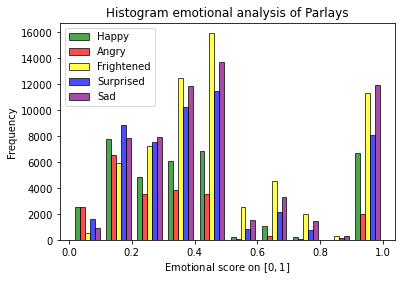

In [37]:
emos = [df['hap'].tolist(),
        df['ang'].tolist(),
        df['fri'].tolist(),
        df['spr'].tolist(),
        df['sad'].tolist()]

emos_star = punch(emos)

plt.hist(emos_star, bins=10, label=['Happy', 'Angry', 'Frightened', 'Surprised', 'Sad'],
         color=["green", "red", "yellow", "blue", "purple"], alpha=0.7,
         edgecolor='black')
plt.legend()
plt.title('Histogram emotional analysis of Parlays')
plt.xlabel('Emotional score on $[0,1]$')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'KDEs for emotional analysis of Parlays')

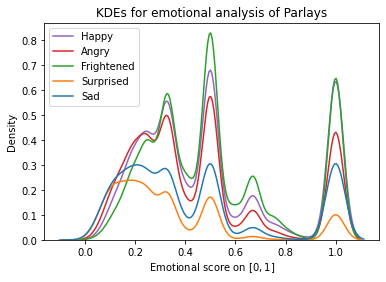

In [38]:
sns.kdeplot(data=emos_star, color=['red', 'purple', 'yellow', 'blue', 'green'])
plt.legend(['Happy', 'Angry', 'Frightened', 'Surprised', 'Sad'])
plt.xlabel('Emotional score on $[0,1]$')
plt.title("KDEs for emotional analysis of Parlays")

In [39]:
df.to_pickle('data/pickle/emo/emo-parler.pkl')

In [41]:
df_reddit = pd.read_pickle('data/pickle/emo/emo-reddit.pkl')
df_twitter = pd.read_pickle('data/pickle/emo/emo-twitter.pkl')
df_4chan = pd.read_pickle('data/pickle/emo/emo-4chan.pkl')
df_fb = pd.read_pickle('data/pickle/emo/emo-fb.pkl')
df_yt = pd.read_pickle('data/pickle/emo/emo-yt.pkl')
df_parler = pd.read_pickle('data/pickle/emo/emo-parler.pkl')

Text(0.5, 1.0, 'Happiness across posts on various social media platforms')

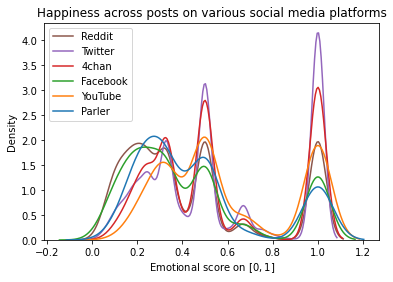

In [42]:
haps = punch([df_reddit['hap'].tolist(),
              df_twitter['hap'].tolist(),
              df_4chan['hap'].tolist(),
              df_fb['hap'].tolist(),
              df_yt['hap'].tolist(),
              df_parler['hap'].tolist()])


sns.kdeplot(data=haps, common_norm=False)
plt.legend(['Reddit','Twitter','4chan','Facebook','YouTube','Parler'])
plt.xlabel('Emotional score on $[0,1]$')
plt.title('Happiness across posts on various social media platforms')

Text(0.5, 1.0, 'Anger across posts on various social media platforms')

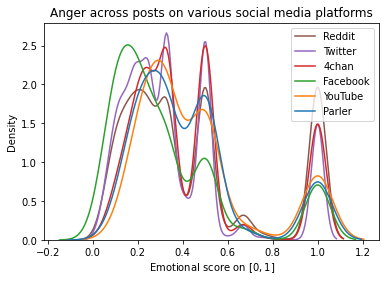

In [43]:
angs = punch([df_reddit['ang'].tolist(),
              df_twitter['ang'].tolist(),
              df_4chan['ang'].tolist(),
              df_fb['ang'].tolist(),
              df_yt['ang'].tolist(),
              df_parler['hap'].tolist()])

sns.kdeplot(data=angs, common_norm=False)
plt.legend(['Reddit','Twitter','4chan','Facebook','YouTube','Parler'])
plt.xlabel('Emotional score on $[0,1]$')
plt.title('Anger across posts on various social media platforms')

Text(0.5, 1.0, 'Surprise across posts on various social media platforms')

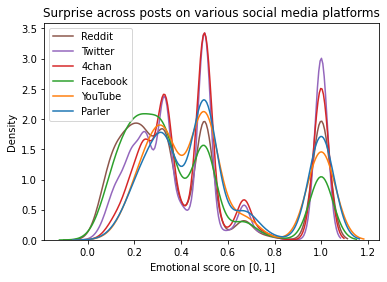

In [44]:
sprs = punch([df_reddit['spr'].tolist(),
              df_twitter['spr'].tolist(),
              df_4chan['spr'].tolist(),
              df_fb['spr'].tolist(),
              df_yt['spr'].tolist(),
              df_parler['hap'].tolist()])

sns.kdeplot(data=sprs, common_norm=False)
plt.legend(['Reddit','Twitter','4chan','Facebook','YouTube','Parler'])
plt.xlabel('Emotional score on $[0,1]$')
plt.title('Surprise across posts on various social media platforms')

Text(0.5, 1.0, 'Sadness across posts on various social media platforms')

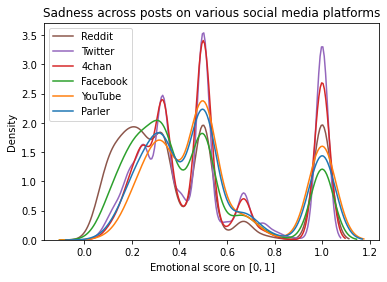

In [45]:
sads = punch([df_reddit['sad'].tolist(),
              df_twitter['sad'].tolist(),
              df_4chan['sad'].tolist(),
              df_fb['sad'].tolist(),
              df_yt['sad'].tolist(),
              df_parler['hap'].tolist()])

sns.kdeplot(data=sads, common_norm=False)
plt.legend(['Reddit','Twitter','4chan','Facebook','YouTube','Parler'])
plt.xlabel('Emotional score on $[0,1]$')
plt.title('Sadness across posts on various social media platforms')

Text(0.5, 1.0, 'Fear across posts on various social media platforms')

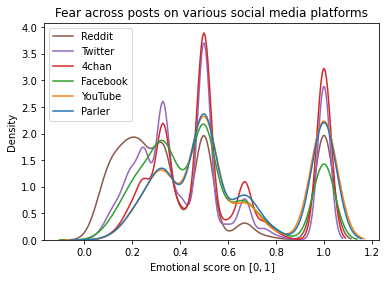

In [46]:
fris = punch([df_reddit['fri'].tolist(),
              df_twitter['fri'].tolist(),
              df_4chan['fri'].tolist(),
              df_fb['fri'].tolist(),
              df_yt['fri'].tolist(),
              df_parler['hap'].tolist()])

sns.kdeplot(data=fris, common_norm=False)
plt.legend(['Reddit','Twitter','4chan','Facebook','YouTube','Parler'])
plt.xlabel('Emotional score on $[0,1]$')
plt.title('Fear across posts on various social media platforms')

In [3]:
df = pd.read_csv('data/instagram_posts.csv', sep='\t', usecols=['description'], nrows=10000000)

In [17]:
df

,https://38.media.tumblr.com/9f6c25cc350f12aa74a7dc386a5c4985/tumblr_mevmyaKtDf1rgvhr8o1_500.gif,"a man is glaring, and someone with sunglasses appears."
garbage,https://38.media.tumblr.com/9ead028ef62004ef6a...,a cat tries to catch a mouse on a tablet
text,https://38.media.tumblr.com/9f43dc410be85b1159...,a man dressed in red is dancing.
2,https://38.media.tumblr.com/9f659499c8754e40cf...,an animal comes close to another in the jungle
3,https://38.media.tumblr.com/9ed1c99afa7d714118...,a man in a hat adjusts his tie and makes a wei...
4,https://38.media.tumblr.com/9e437d26769cb2ac42...,someone puts a cat on wrapping paper then wrap...
...,...,...
125776,https://38.media.tumblr.com/5c0633e677a97a023c...,a woman with high heels and sexy red underwear...
125777,https://38.media.tumblr.com/402a02c59c7c47c300...,a girl with long dark hair is playing with her...
125778,https://38.media.tumblr.com/02fa66bd747ddbed58...,a guy is staring vapidly with one hand over ha...
125779,https://38.media.tumblr.com/01e70784925ab9fe09...,the man wearing a suit is eating a sliced apple.


In [10]:
df = df.dropna()

In [6]:
df.to_pickle('data/pickle/insta.pkl')

In [8]:
df = pd.read_csv('data/tgif-v1.0.tsv', sep='\t')

In [20]:
df = df.rename(columns={'https://38.media.tumblr.com/9f6c25cc350f12aa74a7dc386a5c4985/tumblr_mevmyaKtDf1rgvhr8o1_500.gif':'garbage', 'a man is glaring, and someone with sunglasses appears.':'text'})

In [22]:
df = df.reset_index()

In [24]:
df = df['text']

In [26]:
df.to_pickle('data/pickle/tumblr.pkl')